# Aprendizado Supervisionado

### Classificação & Regressão

#### 1 - Carregando bibliotecas

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFFFAA', '#AAFFAA', '#AAAAFF','#EFEFEF'])
cmap_bold  = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

#### 2 - Conjunto de dados sintético para classificação binária

<IPython.core.display.Javascript object>


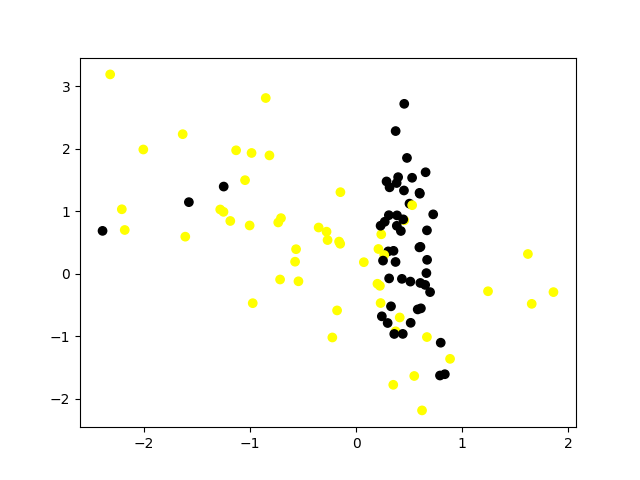

In [2]:
from sklearn.datasets import make_classification

plt.figure()

X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.2,
                                class_sep = 0.5, random_state=0)

plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2, marker='o', cmap=cmap_bold)

plt.show()

#### 3 - KNN binário

<IPython.core.display.Javascript object>


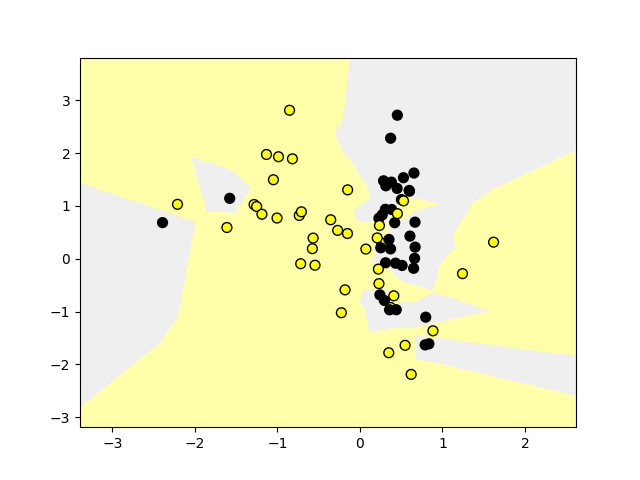

/var/folders/01/_r7b02r11p15j0s54gb9x0040000gn/T/ipykernel_22746/2284455823.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


Escore treinamento: 1.0
Escore teste: 0.64


<IPython.core.display.Javascript object>


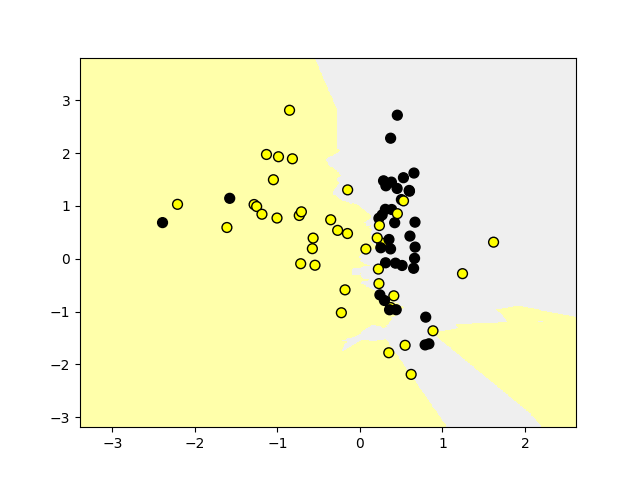

/var/folders/01/_r7b02r11p15j0s54gb9x0040000gn/T/ipykernel_22746/2284455823.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


Escore treinamento: 0.7333333333333333
Escore teste: 0.8


<IPython.core.display.Javascript object>


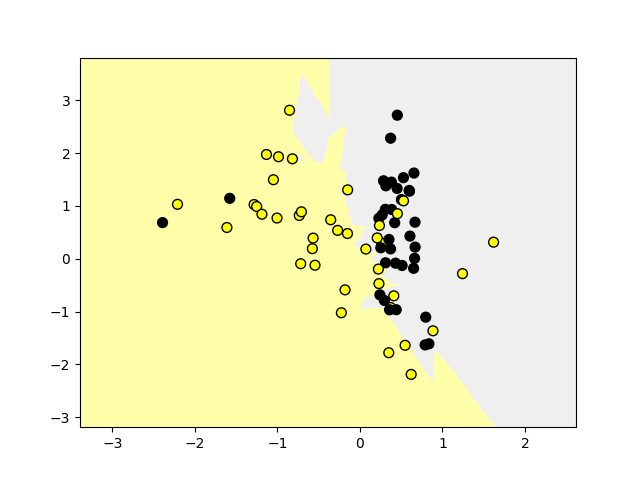

Escore treinamento: 0.8266666666666667
Escore teste: 0.76


/var/folders/01/_r7b02r11p15j0s54gb9x0040000gn/T/ipykernel_22746/2284455823.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


In [3]:
def plot_two_class_knn(X, y, n_neighbors, X_test, y_test):
    X_mat = X
    y_mat = y

    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X_mat, y_mat)

    mesh_step_size = .01
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=50, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    print('Escore treinamento:', clf.score(X_mat, y_mat))
    print('Escore teste:',clf.score(X_test, y_test))

    
    plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state=0)

plot_two_class_knn(X_train, y_train, 1, X_test, y_test)
plot_two_class_knn(X_train, y_train, 11, X_test, y_test)
plot_two_class_knn(X_train, y_train, 30, X_test, y_test)

#### 4 - Conjunto de dados sintético para regressão simples

<IPython.core.display.Javascript object>


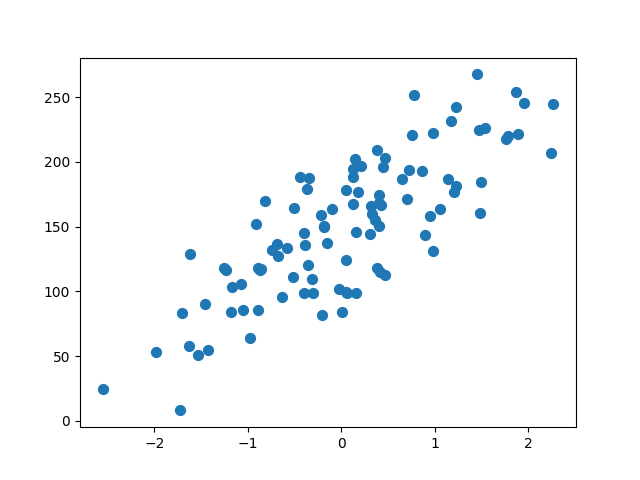

In [4]:
from sklearn.datasets import make_regression

plt.figure()

make_regression?

X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)

plt.show()

#### 5 - Regressão com KNN

In [5]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))

print(knnreg.score(X_test, y_test))

[231.70974697 148.35572605 150.58852659 150.58852659  72.14859259
 166.50590948 141.90634426 235.57098756 208.25897836 102.10462746
 191.31852674 134.50044902 228.32181403 148.35572605 159.16911306
 113.46875166 144.03646012 199.23189853 143.19242433 166.50590948
 231.70974697 208.25897836 128.01545355 123.14247619 141.90634426]
0.4246800858234563


#### 6 - Variando o parâmetro K na Regressão

<IPython.core.display.Javascript object>


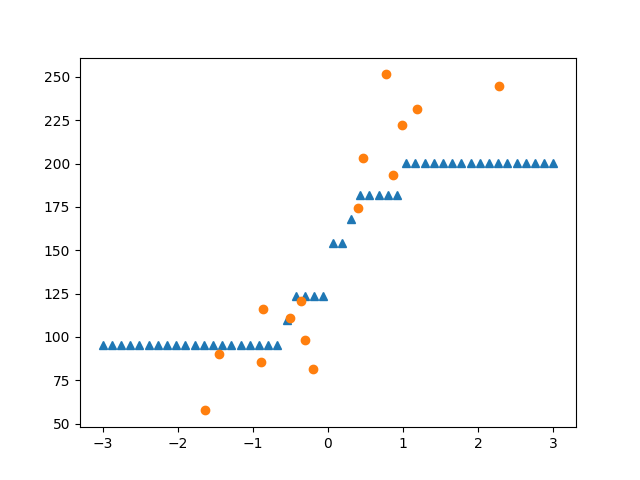

0.7726463757325022
0.05003882842284102


In [6]:
plt.figure()
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 8).fit(X_train, y_train)
y_predict_output = knnreg.predict(X_predict_input)
plt.plot(X_predict_input, y_predict_output, '^')
plt.plot(X_train, y_train, 'o')


print(knnreg.score(X_train, y_train))

print(knnreg.score(X_test, y_test))


plt.show()

#### 7 - $R^2$ escore


<IPython.core.display.Javascript object>


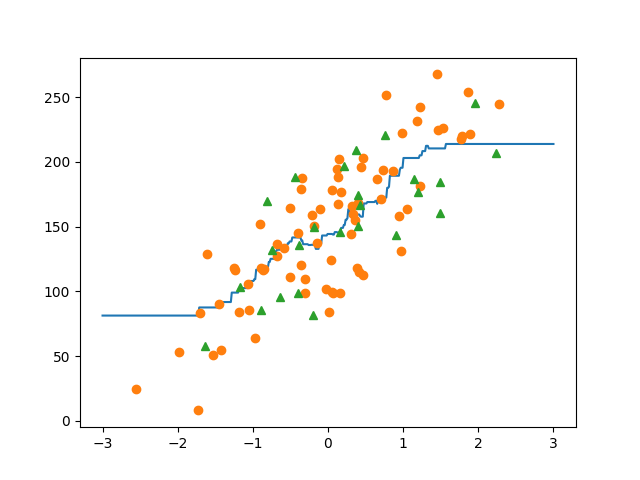

Escore do treinamento: 0.6474391325499353
Escore do teste: 0.48493932421593966


In [7]:
plt.figure()
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

# k = 1, 3, 7, 15, 55

knnreg = KNeighborsRegressor(n_neighbors = 15).fit(X_train, y_train)
y_predict_output = knnreg.predict(X_predict_input)

plt.plot(X_predict_input, y_predict_output)
plt.plot(X_train, y_train, 'o')
plt.plot(X_test, y_test, '^')

print('Escore do treinamento:', knnreg.score(X_train, y_train))
print('Escore do teste:', knnreg.score(X_test, y_test))

plt.show()


## Regressão com modelos lineares

Vetor de características: $x=\left(x_{0}, x_{1}, \ldots, x_{n}\right)$

Saída prevista: $\hat{y}=\widehat{w_{0}} x_{0}+\widehat{w_{1}} x_{1}+\cdots \widehat{w_{n}} x_{n}+\hat{b}$

Parâmentros a se estimar: 

1. $\widehat{\boldsymbol{w}}=(\widehat{w_{0}}, \cdots, \widehat{w_{n}})$ : coeficientes do modelo (pesos das características)

2. $\widehat{\boldsymbol{b}}$ : viés (bias) constante

#### 8 - Regressão linear em dados sintéticos

In [8]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

linreg = LinearRegression().fit(X_train, y_train)

print('Coeff (w):',linreg.coef_)

print('Intercept (b):', linreg.intercept_)

print('R-2 score (treinamento):', linreg.score(X_train, y_train))
print('R-2 score (teste):', linreg.score(X_test, y_test))



Coeff (w): [45.70870465]
Intercept (b): 148.44575345658873
R-2 score (treinamento): 0.6785950771141656
R-2 score (teste): 0.4915961593493031


#### 9 - Mínimos Quadrados

Minimizar $R S S(\boldsymbol{w}, b)=\sum_{\{i=1\}}^{N}\left(\boldsymbol{y}_{i}-\left(\boldsymbol{w} \cdot \boldsymbol{x}_{i}+b\right)\right)^{2}$

$\hat{y}=w_{0} x_{0}+b$

$w_{0}$ = linreg.coef_

b = linreg.intercept_

<IPython.core.display.Javascript object>


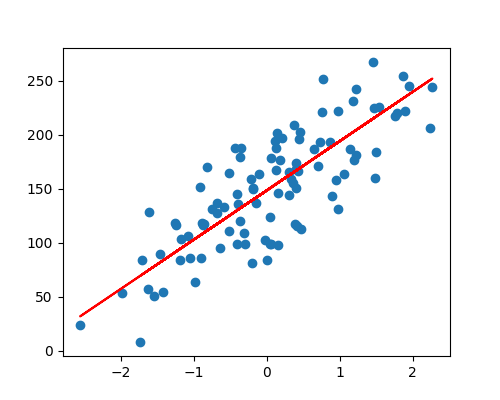

In [9]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o')
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.show()

#### 10 - Carregando a base de dados sobre crimes no EUA

In [11]:
crime = pd.read_table('./Data/CommViolPredUnnormalizedData.txt', sep=',', na_values='?')

# remove características com baixa relevância e com inconsistências
columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]  
crime = crime.iloc[:,columns_to_keep].dropna()

# A coluna ViolentCrimesPerPop é o valor-alvo (y)

X_crime = crime.iloc[:,range(0,88)]
y_crime = crime['ViolentCrimesPerPop']

crime.head()

,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,...,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,ViolentCrimesPerPop
0,11980,3.10,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,...,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,41.02
1,23123,2.82,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,...,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,127.56
2,29344,2.43,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,...,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,218.59
3,16656,2.40,12.55,25.20,12.19,17.57,0,0.0,20580,68.15,...,20.6,14.5,0,0,2.04,88.71,56.70,90.17,96.24,306.64
5,140494,2.45,18.09,32.89,20.04,13.26,140494,100.0,21577,75.78,...,17.3,11.7,327,4,1.49,64.35,42.29,70.61,85.66,442.95


#### 11 - Regressão linear na base de crimes

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('Coeff (w):',linreg.coef_)

print('Intercept (b):', linreg.intercept_)

print('R-2 score (treinamento):', linreg.score(X_train, y_train))
print('R-2 score (teste):', linreg.score(X_test, y_test))

Coeff (w): [ 1.61892346e-03 -9.43009110e+01  1.36067510e+01 -3.13380670e+01
 -8.15482726e-02 -1.69455128e+01 -2.42730375e-03  1.53013232e+00
 -1.39193248e-02 -7.72112833e+00  2.28112354e+01 -5.65708295e+00
  9.34751364e+00  2.06969566e-01 -7.43413626e+00  9.65856476e-03
  4.38030290e-03  4.79754625e-03 -4.46469212e+00 -1.60907140e+01
  8.82778012e+00 -5.06734503e-01 -1.42198055e+00  8.17551991e+00
 -3.87048268e+00 -3.54209213e+00  4.48758304e+00  9.30645715e+00
  1.73644996e+02  1.18220766e+01  1.51120836e+02 -3.29613007e+02
 -1.35343395e+02  6.95380108e-01 -2.38369008e+01  2.77038981e+00
  3.82248925e-01  4.38813358e+00 -1.06410851e+01 -4.92294176e-03
  4.14031827e+01 -1.16206866e-03  1.18568968e+00  1.75418465e+00
 -3.68283678e+00  1.59679443e+00 -8.42180230e+00 -3.79703897e+01
  4.74076990e+01 -2.50768374e+01 -2.88246410e-01 -3.65633234e+01
  1.89516080e+01 -4.53336736e+01  6.82698598e+02  1.04478671e+02
 -3.28575414e+02 -3.14364068e+01  2.74053494e+01  5.12336432e+00
  6.91580764e+

#### 12 - Regressão de Cume

$R S S_{R I D G E}(\boldsymbol{w}, b)=\sum_{[i=1]}^{N}\left(\boldsymbol{y}_{i}-\left(\boldsymbol{w} \cdot \boldsymbol{x}_{i}+b\right)\right)^{2} +\alpha \sum_{j=1}^{p} w_{j}^{2}$

In [13]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

linridge = Ridge(alpha=1e-3).fit(X_train, y_train)

print('Coeff (w):',linridge.coef_)

print('Intercept (b):', linridge.intercept_)

print('R-2 score (treinamento):', linridge.score(X_train, y_train))
print('R-2 score (teste):', linridge.score(X_test, y_test))


Coeff (w): [ 1.61911459e-03 -9.41406956e+01  1.35989717e+01 -3.13448327e+01
 -7.00739195e-02 -1.69460702e+01 -2.42750930e-03  1.53020056e+00
 -1.39159394e-02 -7.71999482e+00  2.28074980e+01 -5.65705906e+00
  9.34654289e+00  2.07063787e-01 -7.43253925e+00  9.65626037e-03
  4.38118872e-03  4.79776889e-03 -4.46417097e+00 -1.60918145e+01
  8.82814441e+00 -5.07298974e-01 -1.41939074e+00  8.17828454e+00
 -3.87038112e+00 -3.54223303e+00  4.48836339e+00  9.30578174e+00
  1.73590654e+02  1.18194311e+01  1.51063462e+02 -3.29507727e+02
 -1.34693455e+02  6.94685224e-01 -2.38376383e+01  2.77068015e+00
  3.82582627e-01  4.38782791e+00 -1.06411972e+01 -4.92300167e-03
  4.14010579e+01 -1.16212658e-03  1.18575752e+00  1.75396867e+00
 -3.68270616e+00  1.59652556e+00 -8.43284200e+00 -3.79543999e+01
  4.73984357e+01 -2.50709074e+01 -2.88017117e-01 -3.65600728e+01
  1.89102062e+01 -4.52871999e+01  6.81281583e+02  1.05064534e+02
 -3.28506177e+02 -3.14634503e+01  2.74096196e+01  5.12213682e+00
  6.91544670e+

#### 13 - Regressão de Cume com normalização de característica

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Coeff (w):',linridge.coef_)

print('Intercept (b):', linridge.intercept_)

print('R-2 score (treinamento):', linridge.score(X_train_scaled, y_train))
print('R-2 score (teste):', linridge.score(X_test_scaled, y_test))

Coeff (w): [  88.68827454   16.48947987  -50.30285445  -82.90507574  -65.89507244
   -2.27674244   87.74108514  150.94862182   18.8802613   -31.05554992
  -43.13536109 -189.44266328   -4.52658099  107.97866804  -76.53358414
    2.86032762   34.95230077   90.13523036   52.46428263  -62.10898424
  115.01780357    2.66942023    6.94331369   -5.66646499 -101.55269144
  -36.9087526    -8.7053343    29.11999068  171.25963057   99.36919476
   75.06611841  123.63522539   95.24316483 -330.61044265 -442.30179004
 -284.49744001 -258.37150609   17.66431072 -101.70717151  110.64762887
  523.13611718   24.8208959     4.86533322  -30.46775619   -3.51753937
   50.57947231   10.84840601   18.27680946   44.11189865   58.33588176
   67.08698975  -57.93524659  116.1446052    53.81163718   49.01607711
   -7.62262031   55.14288543  -52.08878272  123.39291017   77.12562171
   45.49795317  184.91229771  -91.35721203    1.07975971  234.09267451
   10.3887921    94.7171829   167.91856631  -25.14025088   -1.1824

#### 14 - Regressão de Cume, normalização e o parâmetro alpha

In [15]:
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\ncoeff > 1.0: {}, \
R-2 treinamento: {:.2f}, R-2 teste: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Alpha = 0.00
coeff > 1.0: 88, R-2 treinamento: 0.67, R-2 teste: 0.50

Alpha = 1.00
coeff > 1.0: 87, R-2 treinamento: 0.66, R-2 teste: 0.56

Alpha = 10.00
coeff > 1.0: 87, R-2 treinamento: 0.63, R-2 teste: 0.59

Alpha = 20.00
coeff > 1.0: 88, R-2 treinamento: 0.61, R-2 teste: 0.60

Alpha = 50.00
coeff > 1.0: 86, R-2 treinamento: 0.58, R-2 teste: 0.58

Alpha = 100.00
coeff > 1.0: 87, R-2 treinamento: 0.55, R-2 teste: 0.55

Alpha = 1000.00
coeff > 1.0: 84, R-2 treinamento: 0.31, R-2 teste: 0.30



#### 15 - Regressão Lasso com normalização

$R S S_{L A S S O}(\boldsymbol{w}, b)=\sum_{\{i=1\}}^{N}\left(y_{i}-\left(\boldsymbol{w} \cdot \boldsymbol{x}_{i}+b\right)\right)^{2}$ $+\alpha \sum_{\{j=1\}}^{p}\left|w_{j}\right|$

In [16]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)



print('Lasso intercept: {}'
     .format(linlasso.intercept_))
print('Lasso coeff:\n{}'
     .format(linlasso.coef_))
print('Características não zeradas: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-2 score (treinamento): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-2 score (teste): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Características com peso diferente de zero:')

for e in sorted (list(zip(list(X_crime), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Lasso intercept: 1186.612061998579
Lasso coeff:
[    0.             0.            -0.          -168.18346054
    -0.            -0.             0.           119.6938194
     0.            -0.             0.          -169.67564456
    -0.             0.            -0.             0.
     0.             0.            -0.            -0.
     0.            -0.             0.             0.
   -57.52991966    -0.            -0.             0.
   259.32889226    -0.             0.             0.
     0.            -0.         -1188.7396867     -0.
    -0.            -0.          -231.42347299     0.
  1488.36512229     0.            -0.            -0.
    -0.             0.             0.             0.
     0.             0.            -0.             0.
    20.14419415     0.             0.             0.
     0.             0.           339.04468804     0.
     0.           459.53799903    -0.             0.
   122.69221826    -0.            91.41202242     0.
    -0.             0.      

#### 16 - Regressão Lasso com normalização e o parâmetro alpha

In [17]:
for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nCaracterísticas: {}, R-2 treinamento: {:.2f}, \
R-2 teste: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Alpha = 0.50
Características: 35, R-2 treinamento: 0.65, R-2 teste: 0.58

Alpha = 1.00
Características: 25, R-2 treinamento: 0.64, R-2 teste: 0.60

Alpha = 2.00
Características: 20, R-2 treinamento: 0.63, R-2 teste: 0.62

Alpha = 3.00
Características: 17, R-2 treinamento: 0.62, R-2 teste: 0.63

Alpha = 5.00
Características: 12, R-2 treinamento: 0.60, R-2 teste: 0.61

Alpha = 10.00
Características: 6, R-2 treinamento: 0.57, R-2 teste: 0.58

Alpha = 20.00
Características: 2, R-2 treinamento: 0.51, R-2 teste: 0.50

Alpha = 50.00
Características: 1, R-2 treinamento: 0.31, R-2 teste: 0.30



#### 17 - Base de dados para regressões mais complexas

<IPython.core.display.Javascript object>


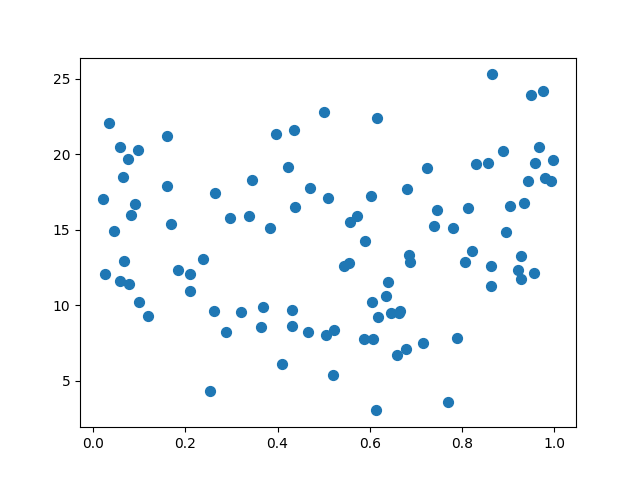

In [18]:
from sklearn.datasets import make_friedman1
plt.figure()

X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

#### 18 - Regressão polinomial

$x=\left(x_{0}, x_{1}\right)$ $\longrightarrow x^{\prime}=\left(x_{0}, x_{1}, x_{0}^{2}, x_{0} x_{1}, x_{1}^{2}\right)$

$\hat{y}=\widehat{w}_{0} x_{0}+\widehat{w}_{1} x_{1}+\widehat{w}_{00} x_{0}^{2}+\widehat{w}_{01} x_{0} x_{1}+\widehat{w}_{11} x_{1}^{2}+b$


In [19]:
from sklearn.preprocessing import PolynomialFeatures


X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('Modelo linear coeff (w): {}'
     .format(linreg.coef_))
print('Modelo linear intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (treinamento): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (teste): {:.3f}'
     .format(linreg.score(X_test, y_test)))

print('\nTransformação polinomial quadrática\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('Polinomial coeff (w):\n{}'
     .format(linreg.coef_))
print('Polinomial intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('Polinomial R-2 score (treinamento): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('Polinomial R-2 score (teste): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))


X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('Polinomial + Cume coeff (w):\n{}'
     .format(linreg.coef_))
print('Polinomial + Cume intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('Polinomial + Cume R-2 score (treinamento): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('Polinomial + Cume R-2 score (teste): {:.3f}'
     .format(linreg.score(X_test, y_test)))

Modelo linear coeff (w): [ 4.42036739  5.99661447  0.52894712 10.23751345  6.5507973  -2.02082636
 -0.32378811]
Modelo linear intercept (b): 1.543
R-squared score (treinamento): 0.722
R-squared score (teste): 0.722

Transformação polinomial quadrática

Polinomial coeff (w):
[ 3.40951018e-12  1.66452443e+01  2.67285381e+01 -2.21348316e+01
  1.24359227e+01  6.93086826e+00  1.04772675e+00  3.71352773e+00
 -1.33785505e+01 -5.73177185e+00  1.61813184e+00  3.66399592e+00
  5.04513181e+00 -1.45835979e+00  1.95156872e+00 -1.51297378e+01
  4.86762224e+00 -2.97084269e+00 -7.78370522e+00  5.14696078e+00
 -4.65479361e+00  1.84147395e+01 -2.22040650e+00  2.16572630e+00
 -1.27989481e+00  1.87946559e+00  1.52962716e-01  5.62073813e-01
 -8.91697516e-01 -2.18481128e+00  1.37595426e+00 -4.90336041e+00
 -2.23535458e+00  1.38268439e+00 -5.51908208e-01 -1.08795007e+00]
Polinomial intercept (b): -3.206
Polinomial R-2 score (treinamento): 0.969
Polinomial R-2 score (teste): 0.805

Polinomial + Cume coeff (w)